<a href="https://colab.research.google.com/github/ctshiz/WORKSPACE_STOCK_MARKET_PREDICTION/blob/main/Trading_Stategy_with_MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Step 1: Determine the installed version of module pandas_datareader
!pip show pandas_datareader
#Step 2: if the version is lower than 0.10.0 then upgrade the version.
!pip install --upgrade pandas_datareader
#Step 3: Don't forget to restart the runtime to load the new libraries.
#Press Runtime->Restart runtime

Name: pandas-datareader
Version: 0.9.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: lxml, requests, pandas
Required-by: 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [1]:
#Step 4: Now try running the step 1 again to determine if the newest version is installed.
!pip show pandas_datareader

Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: requests, pandas, lxml
Required-by: 


In [2]:
#Step-1: Importing Packages
#import libs and select the list of stock to correlate
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn
from math import floor

In [24]:
#Step-2: MACD Calculation
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'Close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df1 = pd.concat(frames, join = 'inner', axis = 1)
    return df1

#Step-3: MACD Plot
def plot_macd(prices, macd, signal, hist):
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
    ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
    ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

    ax1.plot(prices)
    ax2.plot(macd, color = 'grey', linewidth = 1.5, label = 'MACD')
    ax2.plot(signal, color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

    for i in range(len(prices)):
        if str(hist[i])[0] == '-':
            ax2.bar(prices.index[i], hist[i], color = '#ef5350')
        else:
            ax2.bar(prices.index[i], hist[i], color = '#26a69a')

    plt.legend(loc = 'lower right')
    plt.show()

#Step-4: Creating the Trading Strategy
def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]:
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal

#Step-5: Plotting the Trading Lists
def visualize_the_strategy(df, buy, sell, macd):
  fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
  ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
  ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

  ax1.plot(df['Close'], color = 'skyblue', linewidth = 2, label = 'BBAS3')
  ax1.plot(df.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
  ax1.plot(df.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
  ax1.legend()
  ax1.set_title('BBAS3 MACD SIGNALS')
  ax2.plot(macd['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
  ax2.plot(macd['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

  for i in range(len(macd)):
    if str(macd['hist'][i])[0] == '-':
        ax2.bar(macd.index[i], macd['hist'][i], color = '#ef5350')
    else:
        ax2.bar(macd.index[i], macd['hist'][i], color = '#26a69a')
        
  plt.legend(loc = 'lower right')
  plt.show()

In [11]:
#Step-5: Extracting Data from Yahoo Finance
# Now let's define a range, that means, from when until when we want the data:
start_date= datetime(2020, 1, 1) # the format is YYYY-MM-DD
end_date= datetime(2022, 11, 9)
# We will use data from Google and Microsoft in our analysis
banco_brasil= web.DataReader("BBAS3.SA", 'yahoo', start_date, end_date)
banco_brasil = banco_brasil.reset_index()
banco_brasil

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,53.970001,53.169998,53.349998,53.799999,13159900.0,45.521236
1,2020-01-03,53.910000,52.849998,53.099998,53.709999,9465400.0,45.445087
2,2020-01-06,53.400002,52.450001,53.400002,53.000000,9999900.0,44.844341
3,2020-01-07,53.029999,52.290001,53.000000,52.599998,10638500.0,44.505894
4,2020-01-08,52.990002,52.040001,52.759998,52.119999,21468600.0,44.099758
...,...,...,...,...,...,...,...
705,2022-11-03,39.029999,37.200001,39.000000,38.689999,30417900.0,38.689999
706,2022-11-04,39.980000,38.810001,38.959999,39.259998,27290400.0,39.259998
707,2022-11-07,39.189999,37.619999,38.910000,37.889999,23671200.0,37.889999
708,2022-11-08,38.299999,37.320000,37.779999,38.070000,14742300.0,38.070000


In [21]:
##Step-2: MACD Calculation
bbas3_macd = get_macd(banco_brasil['Close'], 26, 12, 9)
bbas3_macd

,macd,signal,hist
0,0.000000,0.000000,0.000000
1,-0.007179,-0.001436,-0.005744
2,-0.069361,-0.015021,-0.054340
3,-0.149197,-0.041856,-0.107341
4,-0.248337,-0.083152,-0.165184
...,...,...,...
705,-0.475775,-0.172725,-0.303050
706,-0.431238,-0.224427,-0.206811
707,-0.500719,-0.279686,-0.221033
708,-0.535090,-0.330766,-0.204323


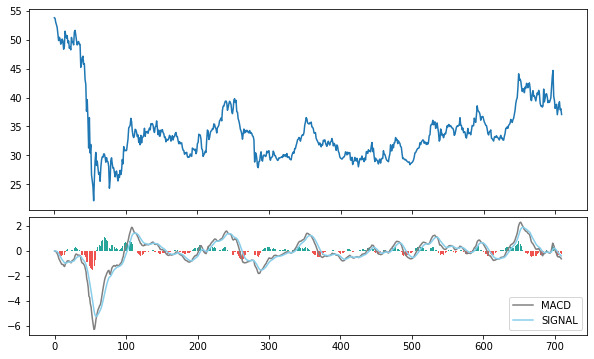

In [22]:
#Step-3: MACD Plotvisualize all the MACD indicators and the historic closing price
plot_macd(banco_brasil['Close'], bbas3_macd['macd'], bbas3_macd['signal'], bbas3_macd['hist'])

In [23]:
##Step-4: Creating the Trading Strategy
buy_price, sell_price, macd_signal = implement_macd_strategy(banco_brasil['Close'], bbas3_macd)

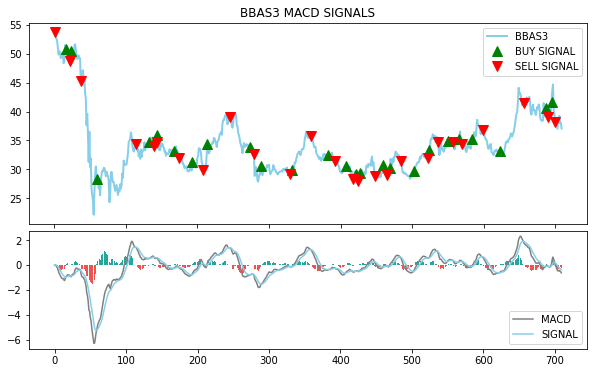

In [25]:
#Step-5: Plotting the Trading Lists
visualize_the_strategy(banco_brasil, buy_price, sell_price, bbas3_macd)

In [26]:
#Step-7: Creating our Position
position = []
for i in range(len(macd_signal)):
    if macd_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(banco_brasil['Close'])):
    if macd_signal[i] == 1:
        position[i] = 1
    elif macd_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]


macd = bbas3_macd['macd']
signal = bbas3_macd['signal']
close_price = banco_brasil['Close']
macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(banco_brasil.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(banco_brasil.index)

frames = [close_price, macd, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy

,Close,macd,signal,macd_signal,macd_position
0,53.799999,0.000000,0.000000,0,1
1,53.709999,-0.007179,-0.001436,-1,0
2,53.000000,-0.069361,-0.015021,0,0
3,52.599998,-0.149197,-0.041856,0,0
4,52.119999,-0.248337,-0.083152,0,0
...,...,...,...,...,...
705,38.689999,-0.475775,-0.172725,0,0
706,39.259998,-0.431238,-0.224427,0,0
707,37.889999,-0.500719,-0.279686,0,0
708,38.070000,-0.535090,-0.330766,0,0


In [27]:
#Step-8: Backtesting
googl_ret = pd.DataFrame(np.diff(banco_brasil['Close'])).rename(columns = {0:'returns'})
macd_strategy_ret = []

for i in range(len(googl_ret)):
    try:
        returns = googl_ret['returns'][i]*strategy['macd_position'][i]
        macd_strategy_ret.append(returns)
    except:
        pass
    
macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})

investment_value = 100000
number_of_stocks = floor(investment_value/df['Close'][0])
macd_investment_ret = []

for i in range(len(macd_strategy_ret_df['macd_returns'])):
    returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
    macd_investment_ret.append(returns)

macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)
print('Profit gained from the MACD strategy by investing $100k in BBAS3 : {}'.format(total_investment_ret))
print('Profit percentage of the MACD strategy : {}%'.format(profit_percentage))

Profit gained from the MACD strategy by investing $100k in BBAS3 : 8602.55
Profit percentage of the MACD strategy : 8%
